<a href="https://colab.research.google.com/github/andrewcgaitskell/voila/blob/master/notebooks/Corona-Virus-Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    drivepath = "/content/drive/My Drive/"
    datafolder = "DashboardData/"
    path2datafolder = drivepath + datafolder
except:
    import os
    cwd = os.getcwd()
    #print(cwd)
    drivepath = cwd + "/"
    datafolder = "Data/"
    path2datafolder = drivepath + datafolder
    print(path2datafolder)
    

/Users/andrewgaitskell/Documents/Dashboards/voila/notebooks/Data/


In [3]:
#import pandas as pd
#line_list_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
#open_line_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
#data = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv")
data = pd.read_csv(path2datafolder + 'Novel Corona Virus 2019 Dataset/covid_19_data.csv',parse_dates=['Last Update','ObservationDate'])
#time_series_confirmed = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
#time_series_deaths = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
#time_series_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")

In [4]:
data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

In [5]:
data.columns

Index(['SNo', 'Date', 'Province/State', 'Country', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [6]:
data.head(10)

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
5,6,2020-01-22,Guangdong,Mainland China,2020-01-22 17:00:00,26.0,0.0,0.0
6,7,2020-01-22,Guangxi,Mainland China,2020-01-22 17:00:00,2.0,0.0,0.0
7,8,2020-01-22,Guizhou,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
8,9,2020-01-22,Hainan,Mainland China,2020-01-22 17:00:00,4.0,0.0,0.0
9,10,2020-01-22,Hebei,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0


In [7]:
data.Country.unique() #list of countries

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [8]:
data_summary_by_country = data.query('Country=="UK"').groupby(["Date","Last Update","Country"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index() # multiple columns required []

In [9]:
df_latestupdate = data.query('Country=="UK"').groupby(["Date","Country"])[["Last Update"]].max().reset_index() # find latest update date for country date combo

In [10]:
latest_data = data_summary_by_country.merge(df_latestupdate,how = 'inner',  left_on=['Last Update','Date','Country'], right_on=['Last Update','Date','Country'], suffixes = ['_l','_r'])

In [11]:
latest_data.head(5)

,Date,Last Update,Country,Confirmed,Deaths,Recovered
0,2020-01-31,2020-01-31 23:59:00,UK,2.0,0.0,0.0
1,2020-02-01,2020-02-01 01:52:00,UK,2.0,0.0,0.0
2,2020-02-02,2020-02-01 01:52:40,UK,2.0,0.0,0.0
3,2020-02-03,2020-02-01 01:52:40,UK,2.0,0.0,0.0
4,2020-02-04,2020-02-01 01:52:40,UK,2.0,0.0,0.0


In [12]:
df_earliest = latest_data.query('Country=="UK" & Confirmed > 0').groupby(["Country"])[["Date"]].min().reset_index()

df_earliest.rename(columns={'Date':'EarliestConfirmedDate'}, inplace=True)

df_earliest.head(6)

,Country,EarliestConfirmedDate
0,UK,2020-01-31


In [13]:
data_withearliest = latest_data.merge(df_earliest,how = 'inner',  left_on=['Country'], right_on=['Country'], suffixes = ['_l','_r'])
data_withearliest['DaysFromStart'] = (data_withearliest['Date'] - data_withearliest['EarliestConfirmedDate']).dt.days
data_withearliest.head(5)

,Date,Last Update,Country,Confirmed,Deaths,Recovered,EarliestConfirmedDate,DaysFromStart
0,2020-01-31,2020-01-31 23:59:00,UK,2.0,0.0,0.0,2020-01-31,0
1,2020-02-01,2020-02-01 01:52:00,UK,2.0,0.0,0.0,2020-01-31,1
2,2020-02-02,2020-02-01 01:52:40,UK,2.0,0.0,0.0,2020-01-31,2
3,2020-02-03,2020-02-01 01:52:40,UK,2.0,0.0,0.0,2020-01-31,3
4,2020-02-04,2020-02-01 01:52:40,UK,2.0,0.0,0.0,2020-01-31,4


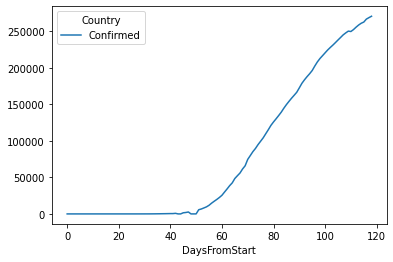

In [14]:
lines = data_withearliest.plot.line(x='DaysFromStart', y='Confirmed').legend(title='Country')

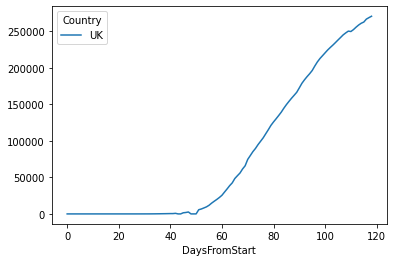

In [15]:
pivoted_df = data_withearliest.pivot(index='DaysFromStart', columns='Country', values='Confirmed')
pivoted_df.plot()

In [16]:
alldata_summary_by_country = data.groupby(["Date","Last Update","Country"])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
alldata_summary_by_country.head()
alldata_latestupdate = data.groupby(["Date","Country"])[["Last Update"]].max().reset_index()

alldata_latest = alldata_summary_by_country.merge(alldata_latestupdate,how = 'inner',  left_on=['Last Update','Date','Country'], right_on=['Last Update','Date','Country'], suffixes = ['_l','_r'])

alldata_earliest = alldata_latest.groupby(["Country"])[["Date"]].min().reset_index()

alldata_earliest.rename(columns={'Date':'EarliestConfirmedDate'}, inplace=True)
alldata_withearliest = alldata_latest.merge(alldata_earliest,how = 'inner',  left_on=['Country'], right_on=['Country'], suffixes = ['_l','_r'])
alldata_withearliest['DaysFromStart'] = (alldata_withearliest['Date'] - alldata_withearliest['EarliestConfirmedDate']).dt.days
alldata_withearliest.head(5)



,Date,Last Update,Country,Confirmed,Deaths,Recovered,EarliestConfirmedDate,DaysFromStart
0,2020-01-22,2020-01-22 17:00:00,Hong Kong,0.0,0.0,0.0,2020-01-22,0
1,2020-01-23,2020-01-23 17:00:00,Hong Kong,2.0,0.0,0.0,2020-01-22,1
2,2020-01-24,2020-01-24 17:00:00,Hong Kong,2.0,0.0,0.0,2020-01-22,2
3,2020-01-25,2020-01-25 17:00:00,Hong Kong,5.0,0.0,0.0,2020-01-22,3
4,2020-01-26,2020-01-26 16:00:00,Hong Kong,8.0,0.0,0.0,2020-01-22,4


In [17]:
significantcountries = alldata_withearliest.groupby(["Country"])[['Confirmed']].max().reset_index()
significantcountries.rename(columns={'Confirmed':'MaximumConfirmed'}, inplace=True)
significantcountries.sort_values('MaximumConfirmed',ascending=False, inplace=True)
significantcountries.head()

,Country,MaximumConfirmed
208,US,1721753.0
27,Brazil,438238.0
168,Russia,379051.0
207,UK,270508.0
188,Spain,237906.0


In [18]:
significantcountries['country_rank'] = significantcountries['MaximumConfirmed'].rank(ascending=False)

#rankprofiles = significantcountries.groupby(["country_rank"]).count().reset_index()

significantcountries.sort_values('MaximumConfirmed',ascending=False, inplace=True)
#significantcountries.head(25)

In [19]:
alldata_significantcountries = alldata_withearliest.merge(significantcountries,how = 'inner',  left_on=['Country'], right_on=['Country'], suffixes = ['_l','_r'])
#alldata_justsignificantcountries = alldata_significantcountries.query('country_rank<25 & country_rank>3').reset_index()
alldata_justsignificantcountries = alldata_significantcountries.query('country_rank<25').reset_index()

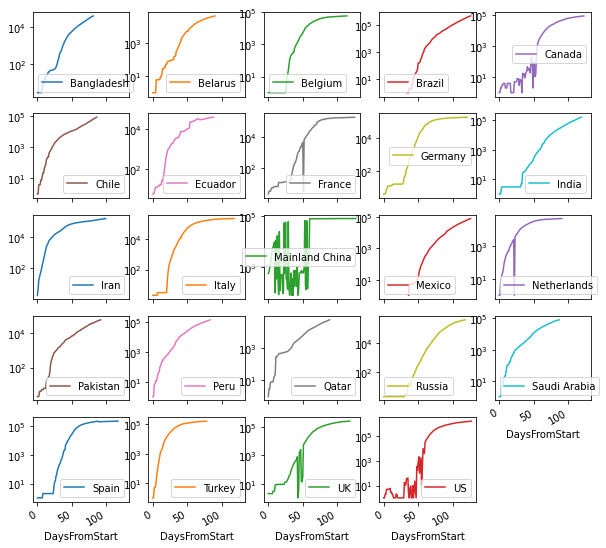

In [20]:
alldata_pivoted_df = alldata_justsignificantcountries.pivot(index='DaysFromStart', columns='Country', values='Confirmed')
alldata_pivoted_df.plot(figsize = (10,10), layout=(5,5), subplots=True, logy = True );

In [21]:
alldata_latest.head(5)

,Date,Last Update,Country,Confirmed,Deaths,Recovered
0,2020-01-22,2020-01-22 17:00:00,Hong Kong,0.0,0.0,0.0
1,2020-01-22,2020-01-22 17:00:00,Japan,2.0,0.0,0.0
2,2020-01-22,2020-01-22 17:00:00,Macau,1.0,0.0,0.0
3,2020-01-22,2020-01-22 17:00:00,Mainland China,547.0,17.0,28.0
4,2020-01-22,2020-01-22 17:00:00,South Korea,1.0,0.0,0.0


In [22]:
#import pandas as pd
#world_population_wb = pd.read_csv("../input/world-population/API_EN.POP.DNST_DS2_en_csv_v2.csv")

In [23]:
#import pandas as pd
countries_data = pd.read_csv(path2datafolder + "countries of the world.csv")

In [24]:
countries_data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [25]:
#import pandas as pd
PovStatsCountry_Series = pd.read_csv(path2datafolder + "Poverty_Stats/PovStatsCountry-Series.csv")
PovStatsCountry = pd.read_csv(path2datafolder + "Poverty_Stats/PovStatsCountry.csv")
PovStatsData = pd.read_csv(path2datafolder + "Poverty_Stats/PovStatsData.csv")
#PovStatsFootNote = pd.read_csv("/Poverty_Stats/PovStatsFootNote.csv")
PovStatsSeries = pd.read_csv(path2datafolder + "Poverty_Stats/PovStatsSeries.csv")

In [26]:
PovStatsCountry_Series.head(5)

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
1,AGO,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
2,ALB,SP.POP.TOTL,"Data sources : Institute of Statistics, Eurostat",NaN
3,ARG,SP.POP.TOTL,Data sources : United Nations World Population...,NaN
4,ARM,SP.POP.TOTL,Data sources : United Nations World Population...,NaN


In [27]:
PovStatsSeries.head(5)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,SI.DST.02ND.20,Poverty: Income distribution,Income share held by second 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
1,SI.DST.03RD.20,Poverty: Income distribution,Income share held by third 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group's goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
2,SI.DST.04TH.20,Poverty: Income distribution,Income share held by fourth 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
3,SI.DST.05TH.20,Poverty: Income distribution,Income share held by highest 20%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN
4,SI.DST.10TH.10,Poverty: Income distribution,Income share held by highest 10%,NaN,Percentage share of income or consumption is t...,%,Annual,NaN,NaN,NaN,...,NaN,The World Bank’s internationally comparable po...,"World Bank, Development Research Group. Data a...",Inequality in the distribution of income is re...,The World Bank Group’s goal of promoting share...,NaN,NaN,NaN,CC BY-4.0,NaN


In [28]:
PovStatsData.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 49
0,East Asia & Pacific,EAS,Annualized growth in per capita real survey me...,SI.SPR.PC40.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,East Asia & Pacific,EAS,Annualized growth in per capita real survey me...,SI.SPR.PT10.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,East Asia & Pacific,EAS,Annualized growth in per capita real survey me...,SI.SPR.PT60.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,East Asia & Pacific,EAS,Annualized growth in per capita real survey me...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,East Asia & Pacific,EAS,GINI index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
PovStatsCountry.head(5)
PovStatsCountry.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data', 'Unnamed: 30'],
      dtype='object')

In [30]:
PovStatsSeries.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')